In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
numb_x_src_path = '../../Dataset/MixedDataSet.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [4]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-59022]

In [5]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [6]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [7]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [8]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [9]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

Training data score: 0.9528301886792453
Test data score: 0.5185185185185185


In [10]:
NPH = 32
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=10, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)



Epoch 1/10


4/4 [==============================] - 1s 72ms/step - loss: 0.5398 - accuracy: 0.8491 - val_loss: 0.3477 - val_accuracy: 0.8148
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.3592 - accuracy: 0.8491 - val_loss: 0.3092 - val_accuracy: 0.8148
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 0.3245 - accuracy: 0.8491 - val_loss: 0.4613 - val_accuracy: 0.8148
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.3899 - accuracy: 0.8585 - val_loss: 0.5224 - val_accuracy: 0.8148
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 0.2993 - accuracy: 0.8679 - val_loss: 0.3192 - val_accuracy: 0.7778
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1805 - accuracy: 0.9057 - val_loss: 0.2644 - val_accuracy: 0.8148
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.2032 - accuracy: 0.8962 - val_loss: 0.2465 - val_accuracy: 0.8519
Epoch 8/10
4/4 [=======

In [20]:
# numb_model.summary()
# numb_model.save("scaled_model.h5")

Epoch 1/10
5/5 [==============================] - 0s 5ms/step - loss: 26.7616 - accuracy: 0.9248
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 6.3010 - accuracy: 0.9850
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 8.8731 - accuracy: 0.9474
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 17.8957 - accuracy: 0.9549
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 22.9171 - accuracy: 0.9023
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 62.4544 - accuracy: 0.9398
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 9.2239 - accuracy: 0.9474
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 9.3184 - accuracy: 0.9549
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7427 - accuracy: 0.9925
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 8.1833 - accuracy: 0.9624


c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
    print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

Number: 0, Perceptron: 1 Actual: 0
Number: 1, Perceptron: 0 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 0 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 0 Actual: 1
Number: 1, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0


In [13]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
numb_model.save("haldmodel.h5")

1/1 [==============================] - 0s 26ms/step - loss: 0.1600 - accuracy: 0.9630
0.9629629850387573


c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


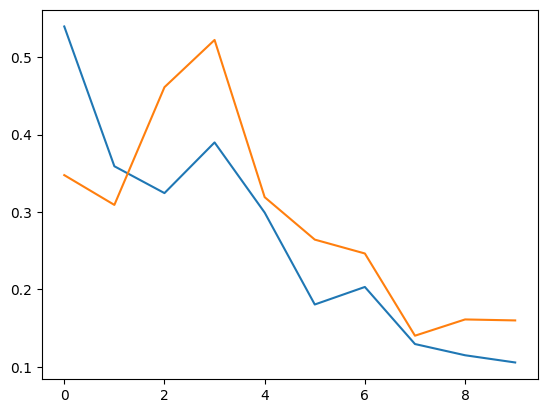

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

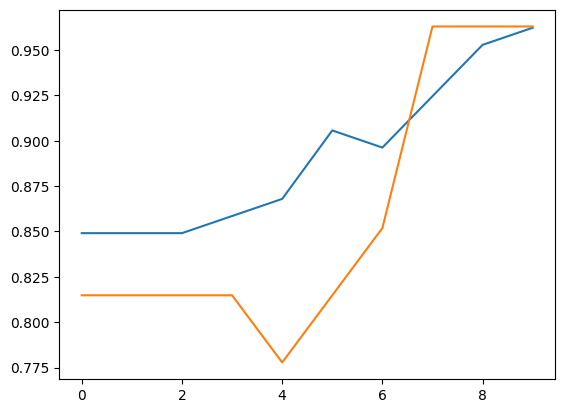

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])